## DS FIFA WORLD CUP EDA - ARTHUR ADAM

In this notebook, we're going to explore the data of a csv file containing results of FIFA football games.

After this, we're going to create a Machine Learning that can predict what team would be the winner for the World Cup beginning on November 20th.

Firstly, we're going to import our csv file in order to have data to work with.

In [535]:
import pandas as pd
import numpy as np

df = pd.read_csv('international_matches.csv')
df['date'] = pd.to_datetime(df['date'])

Now that we have the data loaded with pandas, we can begin our EDA.

We will look over our data to see if each row has each data or if some are missing. In order to achieve this, we will use the ``df.describe()`` from pandas.

In [536]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


On our desribe result, we can see that some data are missing on approximatively 15.000 rows between the 'mandatory data' and the score data. Those data won't be revelant for every row so I think we would be able to discard those.

In order to discard those data, we will use our ``df.drop`` function from pandas. But first, let's look at our dataframe to check if our columns will be removed.

In [537]:
df.count()

date                             23921
home_team                        23921
away_team                        23921
home_team_continent              23921
away_team_continent              23921
home_team_fifa_rank              23921
away_team_fifa_rank              23921
home_team_total_fifa_points      23921
away_team_total_fifa_points      23921
home_team_score                  23921
away_team_score                  23921
tournament                       23921
city                             23921
country                          23921
neutral_location                 23921
shoot_out                        23921
home_team_result                 23921
home_team_goalkeeper_score        8379
away_team_goalkeeper_score        8095
home_team_mean_defense_score      7787
home_team_mean_offense_score      8510
home_team_mean_midfield_score     8162
away_team_mean_defense_score      7564
away_team_mean_offense_score      8312
away_team_mean_midfield_score     7979
dtype: int64

In [538]:
df = df.drop(['city', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'away_team_mean_defense_score', 'home_team_mean_offense_score', 'away_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score'], axis=1)

df.count()

date                           23921
home_team                      23921
away_team                      23921
home_team_continent            23921
away_team_continent            23921
home_team_fifa_rank            23921
away_team_fifa_rank            23921
home_team_total_fifa_points    23921
away_team_total_fifa_points    23921
home_team_score                23921
away_team_score                23921
tournament                     23921
country                        23921
neutral_location               23921
shoot_out                      23921
home_team_result               23921
dtype: int64

As we see, we remove the data that weren't available on all rows.

Let's now describe our cleaned data, in order to analyse much clearer our datas.

In [539]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000


Now that we have some insights, let's find some new insights such as how home teams manage in playing their games.

In [540]:
print(f'Winrate of Home Teams: {(len(df.loc[df["home_team_result"] == "Win"]) * 100) / len(df): .2f}%')
print(f'Draw rate of Home Teams: {(len(df.loc[df["home_team_result"] == "Draw"]) * 100) / len(df): .2f}%')
print(f'Lose rate of Home Teams: {(len(df.loc[df["home_team_result"] == "Lose"]) * 100) / len(df): .2f}%')

Winrate of Home Teams:  49.17%
Draw rate of Home Teams:  22.53%
Lose rate of Home Teams:  28.31%


With those data, we can say that on average a home team has 49.17% chance of winning and 71.1% change of not loosing a match. This could be explained by the fact that a home team is more confident and more enthousiastic to play in front of his supporters than in front of a lot of oponent supporters.

To stay in our subject of the world cup, our next step will be to analyse how teams perform before each world cup campaign.

In [541]:
df['year'] = df['date'].apply(lambda x: x.year)

home_team_result_rates = {}

for year in df["year"].unique():
    home_team_result_rates[year] = dict()
    tmp = df[df["year"] == year]

    home_team_result_rates[year] = {"Winrate": len(tmp.loc[tmp["home_team_result"] == "Win"]) / len(tmp) * 100, "Draw Rate": len(tmp.loc[tmp["home_team_result"] == "Draw"]) / len(tmp) * 100, "Lose Rate": len(tmp.loc[tmp["home_team_result"] == "Lose"]) / len(tmp) * 100}

yearRatesDf = pd.DataFrame.from_dict(home_team_result_rates, orient="index", columns=["Winrate", "Draw Rate", "Lose Rate"])
yearRatesDf

,Winrate,Draw Rate,Lose Rate
1993,54.385965,18.713450,26.900585
1994,45.951417,24.696356,29.352227
1995,55.141844,20.567376,24.290780
1996,51.344430,20.486556,28.169014
1997,51.944793,22.333752,25.721455
1998,49.528302,24.842767,25.628931
1999,49.850746,23.582090,26.567164
2000,52.165156,21.550856,26.283988
2001,49.213012,22.665268,28.121721
2002,46.790300,23.823110,29.386591


<AxesSubplot: >

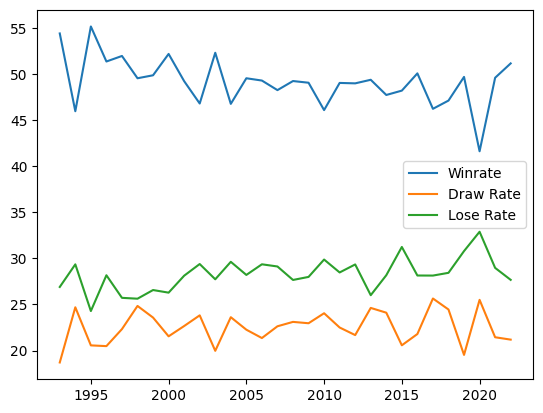

In [526]:
yearRatesDf.plot.line()

Now we have the data for each year, let's compare those data with the result rate data we found above.

In [420]:
yearRatesDf.describe()

,Winrate,Draw Rate,Lose Rate
count,30.000000,30.000000,30.000000
mean,49.180096,22.544900,28.275004
std,2.661701,1.806342,1.773558
min,41.610738,18.713450,24.290780
25%,47.833710,21.384397,27.662369
50%,49.252733,22.571128,28.170801
75%,50.005939,23.993752,29.349661
max,55.141844,25.649718,32.885906


The value we found above are almost the same at 0.01%. We can see that for each year our winrate is the most variable with a variance of 14% where draw rate and loserate have a variance of 7% and 8%.

We can also check the results rates by continent by the same way, we use above:

In [421]:
home_team_result_rates = {}

for continent in pd.unique(df[['home_team_continent', 'away_team_continent']].values.ravel('K')).tolist():
    home_team_result_rates[continent] = dict()
    tmp = df[df["home_team_continent"] == continent]

    home_team_result_rates[continent] = {"Winrate": len(tmp.loc[tmp["home_team_result"] == "Win"]) / len(tmp) * 100, "Draw Rate": len(tmp.loc[tmp["home_team_result"] == "Draw"]) / len(tmp) * 100, "Lose Rate": len(tmp.loc[tmp["home_team_result"] == "Lose"]) / len(tmp) * 100}

continentRatesDf = pd.DataFrame.from_dict(home_team_result_rates, orient="index", columns=["Winrate", "Draw Rate", "Lose Rate"])
continentRatesDf

,Winrate,Draw Rate,Lose Rate
South America,57.748777,20.609027,21.642197
Africa,49.991504,24.655905,25.352591
Europe,46.318978,22.204662,31.476360
Oceania,53.962264,15.660377,30.377358
Asia,48.755187,22.632969,28.611845
North America,49.386724,21.284271,29.329004


<AxesSubplot: >

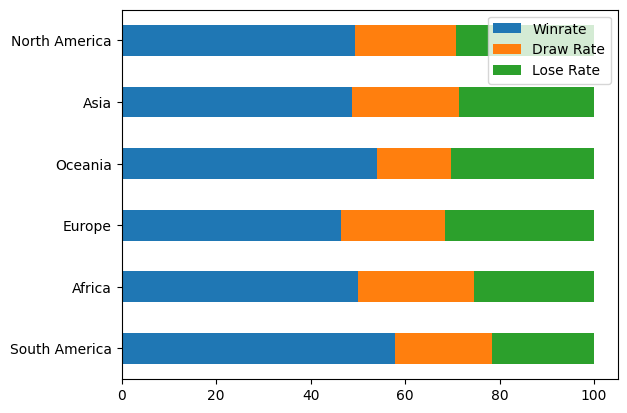

In [422]:
continentRatesDf.plot.barh(stacked=True)

Here are the rates for the each continent, but the winrate can be affected by the number of games played by each continent let's check.

In [423]:
home_team_matches = {}

for continent in pd.unique(df[['home_team_continent', 'away_team_continent']].values.ravel('K')).tolist():
    home_team_matches[continent] = dict()
    tmp = df[df["home_team_continent"] == continent]

    home_team_matches[continent] = len(tmp)

nbGamesByContinentDf = pd.DataFrame.from_dict(home_team_matches, orient="index")
nbGamesByContinentDf

,0
South America,1839
Africa,5885
Europe,7593
Oceania,530
Asia,5302
North America,2772


By those results, we can see that South America have the highest winrate overall, the second lowest draw rate and the lowest loserate overall even if they didn't play that much games. As I said above, I think that because of the supporters that sometimes lives for football such as Brazil or Argentina where some kids have as only source of getting out of poverty is by playing football (Angel Di Maria, Lionel Messi, Alexis Sanchez, ...).

Now we have our team results rates, we can wondering by how much goals did those teams win.

In [424]:
from statistics import fmean, median, median_low, median_high, stdev, variance

home_team_goals = {}

for continent in pd.unique(df[['home_team_continent', 'away_team_continent']].values.ravel('K')).tolist():
    home_team_goals[continent] = []

for _, row in df.iterrows():
    home_team_goals[row['home_team_continent']].append(row['home_team_score'])

result = dict(map(lambda x: (x[0], [fmean(x[1]), median(x[1]), median_low(x[1]), median_high(x[1]), stdev(x[1]), variance(x[1])]), home_team_goals.items()))

homeGoalsDf = pd.DataFrame.from_dict(result, orient="index", columns=["Average Scored Goals", "Q1", "Median number of scored goals", "Q3", "Standard Deviation", "Variance"])
homeGoalsDf

,Average Scored Goals,Q1,Median number of scored goals,Q3,Standard Deviation,Variance
South America,1.820011,2.0,2,2,1.586708,2.517641
Africa,1.455225,1.0,1,1,1.363395,1.858846
Europe,1.540498,1.0,1,1,1.508048,2.274209
Oceania,2.228302,2.0,2,2,2.846872,8.104680
Asia,1.706149,1.0,1,1,1.808935,3.272247
North America,1.680736,1.0,1,1,1.759077,3.094353


<AxesSubplot: >

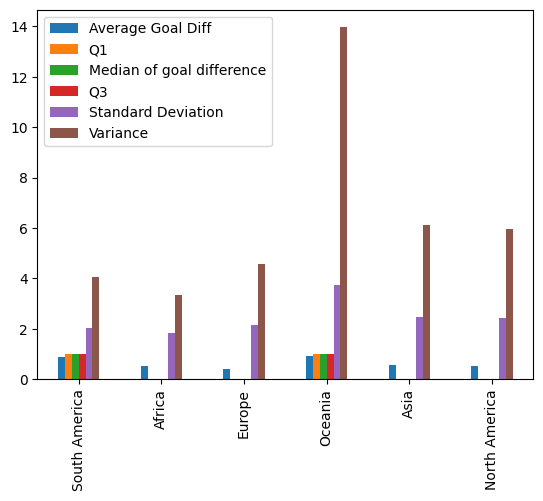

In [425]:
goalsDiffDf.plot.bar()

In [426]:
from statistics import fmean, median, median_low, median_high, stdev, variance

home_team_goals = {}

for continent in pd.unique(df[['home_team_continent', 'away_team_continent']].values.ravel('K')).tolist():
    home_team_goals[continent] = []

for _, row in df.iterrows():
    home_team_goals[row['home_team_continent']].append(row['away_team_score'])

result = dict(map(lambda x: (x[0], [fmean(x[1]), median(x[1]), median_low(x[1]), median_high(x[1]), stdev(x[1]), variance(x[1])]), home_team_goals.items()))

awayGoalsDf = pd.DataFrame.from_dict(result, orient="index", columns=["Average Conceded Goals", "Q1", "Median number of conceded goals", "Q3", "Standard Deviation", "Variance"])
awayGoalsDf

,Average Conceded Goals,Q1,Median number of conceded goals,Q3,Standard Deviation,Variance
South America,0.930397,1.0,1,1,1.061517,1.126818
Africa,0.924724,1.0,1,1,1.117019,1.247732
Europe,1.124588,1.0,1,1,1.234287,1.523464
Oceania,1.298113,1.0,1,1,1.830687,3.351414
Asia,1.127310,1.0,1,1,1.374098,1.888147
North America,1.153319,1.0,1,1,1.370652,1.878686


<AxesSubplot: >

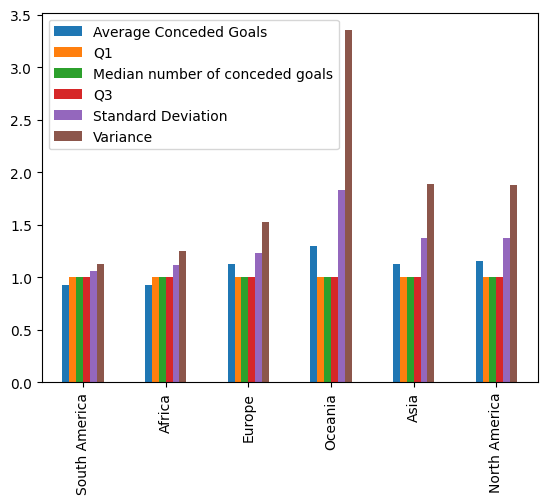

In [427]:
awayGoalsDf.plot.bar()

In [428]:
from statistics import fmean, median, median_low, median_high, stdev, variance

home_team_goals = {}

for continent in pd.unique(df[['home_team_continent', 'away_team_continent']].values.ravel('K')).tolist():
    home_team_goals[continent] = []

for _, row in df.iterrows():
    home_team_goals[row['home_team_continent']].append(row['home_team_score'] - row['away_team_score'])

result = dict(map(lambda x: (x[0], [fmean(x[1]), median(x[1]), median_low(x[1]), median_high(x[1]), stdev(x[1]), variance(x[1])]), home_team_goals.items()))

goalsDiffDf = pd.DataFrame.from_dict(result, orient="index", columns=["Average Goal Diff", "Q1", "Median of goal difference", "Q3", "Standard Deviation", "Variance"])
goalsDiffDf

,Average Goal Diff,Q1,Median of goal difference,Q3,Standard Deviation,Variance
South America,0.889614,1.0,1,1,2.014986,4.060170
Africa,0.530501,0.0,0,0,1.833009,3.359921
Europe,0.415909,0.0,0,0,2.138283,4.572255
Oceania,0.930189,1.0,1,1,3.736201,13.959200
Asia,0.578838,0.0,0,0,2.471286,6.107253
North America,0.527417,0.0,0,0,2.441884,5.962799


<AxesSubplot: >

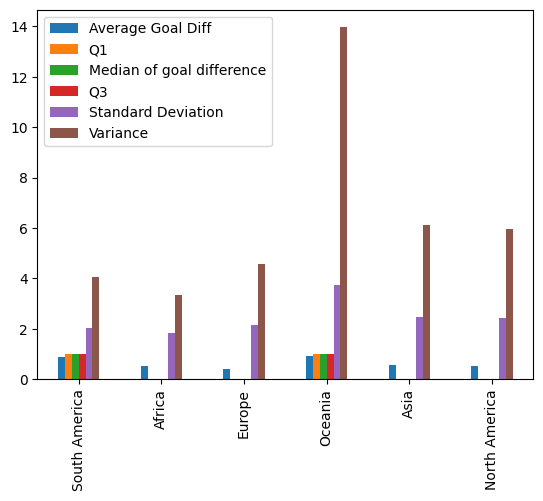

In [429]:
goalsDiffDf.plot.bar()

We can see that what we suspected above is maybe true. The South Americans teams score a lot of goals on average and they also conceded not much goals on average. Their goal difference is very high tho.

We can see that Oceanian teams score also a lot of goals but they conceded a lot of goals. Oceanian teams have also a large diversity of scores because the goal difference variance is approximatively equal to 14, telling us that they score a very high number of goals and getting also a high number of goals conceded.
This data is maybe rigged because some good Oceanian teams such as Australia plays against not very know teams such as American Samoa and win 31 to 0 some matches.

We can even go further by getting winrates for each country:

In [430]:
list_of_teams = pd.unique(df[['home_team', 'away_team']].values.ravel('K')).tolist()

In [431]:
home_team_result_rates = {}

for team in list_of_teams:
    home_team_result_rates[team] = dict()

    tmp = df[((df["home_team"] == team) & (df["away_team"] != team)) | ((df["home_team"] != team) & (df["away_team"] == team))]
    home_team_result_rates[team] = {"Winrate": len(tmp.loc[((tmp["home_team_result"] == "Win") & (tmp['home_team'] == team)) | ((tmp["home_team_result"] == "Lose") & (tmp['home_team'] != team))]) / len(tmp) * 100, "Draw Rate": len(tmp.loc[tmp["home_team_result"] == "Draw"]) / len(tmp) * 100, "Lose Rate": len(tmp.loc[((tmp["home_team_result"] == "Win") & (tmp['home_team'] != team)) | ((tmp["home_team_result"] == "Lose") & (tmp['home_team'] == team))]) / len(tmp) * 100}

teamRatesDf = pd.DataFrame.from_dict(home_team_result_rates, orient="columns")
teamRatesDf

,Bolivia,Brazil,Ecuador,Guinea,Paraguay,Peru,Zimbabwe,Faroe Islands,Sweden,Australia,...,Serbia,New Caledonia,Montenegro,Timor-Leste,Comoros,Chinese Taipei,Curaçao,South Sudan,Kosovo,Gibraltar
Winrate,22.456140,69.515012,37.910448,39.230769,35.014837,34.504792,41.719745,16.494845,48.548813,52.768730,...,44.943820,50.769231,34.126984,9.090909,19.444444,24.731183,32.352941,19.230769,35.593220,10.0
Draw Rate,25.614035,17.551963,24.179104,23.846154,27.299703,23.322684,23.566879,12.371134,23.482850,20.521173,...,24.157303,20.000000,28.571429,7.272727,27.777778,9.677419,20.588235,17.307692,18.644068,12.0
Lose Rate,51.929825,12.933025,37.910448,36.923077,37.685460,42.172524,34.713376,71.134021,27.968338,26.710098,...,30.898876,29.230769,37.301587,83.636364,52.777778,65.591398,47.058824,63.461538,45.762712,78.0


We can even get the winrates for each country again each year they've playing.

In [432]:
all_year_df = []
list_of_years = pd.unique(df[['year']].values.ravel('K')).tolist()

for year in list_of_years:
    rates_by_year = dict((el, {"Winrate": 0, "Draw Rate": 0, "Lose Rate": 0}) for el in list_of_teams)

    for team in list_of_teams:
        tmp = df[((df["year"] == year) & (df["home_team"] == team)) | ((df["year"] == year) & (df["away_team"] == team))]
        if len(tmp) == 0:
            continue
        rates_by_year[team] = {'Winrate': len(tmp.loc[((tmp["home_team_result"] == "Win") & (tmp['home_team'] == team)) | ((tmp["home_team_result"] == "Lose") & (tmp['away_team'] == team))]) / len(tmp) * 100, 'Draw Rate': len(tmp.loc[tmp["home_team_result"] == "Draw"]) / len(tmp) * 100, 'Lose Rate': len(tmp.loc[((tmp["home_team_result"] == "Win") & (tmp['away_team'] == team)) | ((tmp["home_team_result"] == "Lose") & (tmp['home_team'] == team))]) / len(tmp) * 100}
    all_year_df.append(pd.DataFrame.from_dict(rates_by_year))

yearCombinedDf = pd.concat(all_year_df, keys=list_of_years)
yearCombinedDf

Bolivia     Brazil    Ecuador     Guinea   Paraguay  \
1993 Winrate    50.000000  62.500000  16.666667  37.500000   0.000000   
     Draw Rate  16.666667  25.000000  16.666667  25.000000  75.000000   
     Lose Rate  33.333333  12.500000  66.666667  37.500000  25.000000   
1994 Winrate    18.750000  83.333333  50.000000  33.333333   0.000000   
     Draw Rate  43.750000  16.666667  25.000000  11.111111   0.000000   
...                   ...        ...        ...        ...        ...   
2021 Draw Rate  11.764706  18.750000  33.333333  41.666667  26.666667   
     Lose Rate  58.823529   6.250000  33.333333  33.333333  53.333333   
2022 Winrate    20.000000  83.333333  28.571429  33.333333  16.666667   
     Draw Rate   0.000000  16.666667  57.142857  22.222222  16.666667   
     Lose Rate  80.000000   0.000000  14.285714  44.444444  66.666667   

                     Peru   Zimbabwe  Faroe Islands     Sweden  Australia  \
1993 Winrate     0.000000  80.000000       0.000000  20.000000  20.000000   
     Draw Rate  25.000000   0.000000       0.000000  60.000000  40.000000   
     Lose Rate  75.000000  20.000000     100.000000  20.000000  40.000000   
1994 Winrate    14.285714   0.000000       0.000000  57.894737  33.333333   
     Draw Rate  28.571429  25.000000       0.000000  21.052632  50.000000   
...                   ...        ...            ...        ...        ...   
2021 Draw Rate  11.764706  33.333333       8.333333   6.250000  20.000000   
     Lose Rate  41.176471  58.333333      75.000000  25.000000  10.000000   
2022 Winrate    50.000000  25.000000      33.333333  33.333333  50.000000   
     Draw Rate  25.000000  25.000000      33.333333   0.000000  16.666667   
     Lose Rate  25.000000  50.000000      33.333333  66.666667  33.333333   

                ...     Serbia  New Caledonia  Montenegro  Timor-Leste  \
1993 Winrate    ...   0.000000            0.0    0.000000          0.0   
     Draw Rate  ...   0.000000            0.0    0.000000          0.0   
     Lose Rate  ...   0.000000            0.0    0.000000          0.0   
1994 Winrate    ...   0.000000            0.0    0.000000          0.0   
     Draw Rate  ...   0.000000            0.0    0.000000          0.0   
...             ...        ...            ...         ...          ...   
2021 Draw Rate  ...  35.714286            0.0   33.333333          0.0   
     Lose Rate  ...   7.142857            0.0   41.666667          0.0   
2022 Winrate    ...  50.000000            0.0   50.000000          0.0   
     Draw Rate  ...  16.666667            0.0   16.666667          0.0   
     Lose Rate  ...  33.333333          100.0   33.333333        100.0   

                  Comoros  Chinese Taipei    Curaçao  South Sudan     Kosovo  \
1993 Winrate     0.000000             0.0   0.000000          0.0   0.000000   
     Draw Rate   0.000000             0.0   0.000000          0.0   0.000000   
     Lose Rate   0.000000             0.0   0.000000          0.0   0.000000   
1994 Winrate     0.000000             0.0   0.000000          0.0   0.000000   
     Draw Rate   0.000000             0.0   0.000000          0.0   0.000000   
...                   ...             ...        ...          ...        ...   
2021 Draw Rate  14.285714             0.0  25.000000         20.0  14.285714   
     Lose Rate  42.857143           100.0  37.500000         80.0  50.000000   
2022 Winrate    42.857143             0.0  33.333333         40.0  50.000000   
     Draw Rate   0.000000             0.0   0.000000          0.0  16.666667   
     Lose Rate  57.142857             0.0  66.666667         60.0  33.333333   

                Gibraltar  
1993 Winrate     0.000000  
     Draw Rate   0.000000  
     Lose Rate   0.000000  
1994 Winrate     0.000000  
     Draw Rate   0.000000  
...                   ...  
2021 Draw Rate   8.333333  
     Lose Rate  91.666667  
2022 Winrate     0.000000  
     Draw Rate  50.000000  
     Lose Rate  50.000000  

[90 rows x 211 columns]

Finally, the last data we can get is the winrates for each country again which country. It would help us to know against which team, which team is the more efficient.

In [433]:
all_df = []

for team in list_of_teams:
    rates_list = dict((el, {"Winrate": 0, "Draw Rate": 0, "Lose Rate": 0}) for el in list_of_teams)

    for o_team in list_of_teams:
        if team == o_team:
            continue
        tmp = df[((df["home_team"] == team) & (df["away_team"] == o_team)) | ((df["home_team"] == o_team) & (df["away_team"] == team))]
        if len(tmp) == 0:
            continue

        rates_list[o_team] = {'Winrate': len(tmp.loc[((tmp["home_team_result"] == "Win") & (tmp['home_team'] == team)) | ((tmp["home_team_result"] == "Lose") & (tmp['home_team'] == o_team))]) / len(tmp) * 100, 'Draw Rate': len(tmp.loc[tmp["home_team_result"] == "Draw"]) / len(tmp) * 100, 'Lose Rate': len(tmp.loc[((tmp["home_team_result"] == "Win") & (tmp['home_team'] == o_team)) | ((tmp["home_team_result"] == "Lose") & (tmp['home_team'] == team))]) / len(tmp) * 100}

    all_df.append(pd.DataFrame.from_dict(rates_list))

combinedRatesDf = pd.concat(all_df, keys=list_of_teams)
combinedRatesDf

Bolivia     Brazil    Ecuador  Guinea   Paraguay  \
Bolivia   Winrate     0.000000  13.333333  14.285714     0.0  23.076923   
          Draw Rate   0.000000  20.000000  19.047619     0.0  34.615385   
          Lose Rate   0.000000  66.666667  66.666667     0.0  42.307692   
Brazil    Winrate    66.666667   0.000000  68.421053     0.0  50.000000   
          Draw Rate  20.000000   0.000000  21.052632     0.0  16.666667   
...                        ...        ...        ...     ...        ...   
Kosovo    Draw Rate   0.000000   0.000000   0.000000     0.0   0.000000   
          Lose Rate   0.000000   0.000000   0.000000   100.0   0.000000   
Gibraltar Winrate     0.000000   0.000000   0.000000     0.0   0.000000   
          Draw Rate   0.000000   0.000000   0.000000     0.0   0.000000   
          Lose Rate   0.000000   0.000000   0.000000     0.0   0.000000   

                          Peru  Zimbabwe  Faroe Islands  Sweden  Australia  \
Bolivia   Winrate    28.571429       0.0            0.0     0.0   0.000000   
          Draw Rate  32.142857       0.0            0.0     0.0   0.000000   
          Lose Rate  39.285714       0.0            0.0     0.0   0.000000   
Brazil    Winrate    75.000000     100.0            0.0    80.0  66.666667   
          Draw Rate  15.000000       0.0            0.0    20.0  16.666667   
...                        ...       ...            ...     ...        ...   
Kosovo    Draw Rate   0.000000       0.0           50.0     0.0   0.000000   
          Lose Rate   0.000000       0.0            0.0   100.0   0.000000   
Gibraltar Winrate     0.000000       0.0            0.0     0.0   0.000000   
          Draw Rate   0.000000       0.0          100.0     0.0   0.000000   
          Lose Rate   0.000000       0.0            0.0     0.0   0.000000   

                     ...  Serbia  New Caledonia  Montenegro  Timor-Leste  \
Bolivia   Winrate    ...     0.0            0.0         0.0          0.0   
          Draw Rate  ...     0.0            0.0         0.0          0.0   
          Lose Rate  ...   100.0            0.0         0.0          0.0   
Brazil    Winrate    ...   100.0            0.0         0.0          0.0   
          Draw Rate  ...     0.0            0.0         0.0          0.0   
...                  ...     ...            ...         ...          ...   
Kosovo    Draw Rate  ...     0.0            0.0        50.0          0.0   
          Lose Rate  ...     0.0            0.0         0.0          0.0   
Gibraltar Winrate    ...     0.0            0.0         0.0          0.0   
          Draw Rate  ...     0.0            0.0         0.0          0.0   
          Lose Rate  ...     0.0            0.0       100.0          0.0   

                     Comoros  Chinese Taipei  Curaçao  South Sudan  Kosovo  \
Bolivia   Winrate        0.0             0.0      0.0          0.0     0.0   
          Draw Rate      0.0             0.0     50.0          0.0     0.0   
          Lose Rate      0.0             0.0     50.0          0.0     0.0   
Brazil    Winrate        0.0             0.0      0.0          0.0     0.0   
          Draw Rate      0.0             0.0      0.0          0.0     0.0   
...                      ...             ...      ...          ...     ...   
Kosovo    Draw Rate      0.0             0.0      0.0          0.0     0.0   
          Lose Rate      0.0             0.0      0.0          0.0     0.0   
Gibraltar Winrate        0.0             0.0      0.0          0.0     0.0   
          Draw Rate      0.0             0.0      0.0          0.0     0.0   
          Lose Rate      0.0             0.0      0.0          0.0   100.0   

                     Gibraltar  
Bolivia   Winrate          0.0  
          Draw Rate        0.0  
          Lose Rate        0.0  
Brazil    Winrate          0.0  
          Draw Rate        0.0  
...                        ...  
Kosovo    Draw Rate        0.0  
          Lose Rate        0.0  
Gibraltar Winrate          0.0  
     

## Predict game results

Now, we have our data and our EDA. We can create a prediction model and compile this model to predicate game results.

Let's begin by downloading tensorflow and tensorflow extension for decision forests.

In [542]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

First, in order to use our dataset, we need to encode each categorical data into intergers. For that, we are going to take each categorical data inside a list and take their index as value for the dataset.

We also have to drop some data that can influence the result of the prediction.

In [543]:
team_classes = list_of_teams
df['home_team'] = df['home_team'].map(team_classes.index)
df['away_team'] = df['away_team'].map(team_classes.index)

continent_classes = df['home_team_continent'].unique().tolist()
df['home_team_continent'] = df['home_team_continent'].map(continent_classes.index)
df['away_team_continent'] = df['away_team_continent'].map(continent_classes.index)

country_classes = df['country'].unique().tolist()
df['country'] = df['country'].map(country_classes.index)

neutral_location_classes = df['neutral_location'].unique().tolist()
df['neutral_location'] = df['neutral_location'].map(neutral_location_classes.index)

tournament_classes = df['tournament'].unique().tolist()
df['tournament'] = df['tournament'].map(tournament_classes.index)

shoot_out_classes = df['shoot_out'].unique().tolist()
df['shoot_out'] = df['shoot_out'].map(shoot_out_classes.index)

home_team_result_classes = df['home_team_result'].unique().tolist()
df['home_team_result'] = df['home_team_result'].map(home_team_result_classes.index)

df["date"] = df["date"].apply(lambda x: x.value)

df = df.drop(["home_team_score", "away_team_score", "shoot_out"], axis=1)
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,tournament,country,neutral_location,home_team_result,year
0,744768000000000000,0,12,0,0,59,22,0,0,0,0,0,0,1993
1,744768000000000000,1,32,0,5,8,14,0,0,1,1,0,1,1993
2,744768000000000000,2,29,0,0,35,94,0,0,0,2,0,0,1993
3,744768000000000000,3,67,1,1,65,86,0,0,1,3,0,0,1993
4,744768000000000000,4,13,0,0,67,5,0,0,0,4,0,2,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,1655164800000000000,122,177,2,2,180,153,932,1040,75,112,0,0,2022
23917,1655164800000000000,57,105,2,2,192,135,895,1105,75,53,0,2,2022
23918,1655164800000000000,98,71,0,1,28,60,1526,1387,11,39,1,2,2022
23919,1655164800000000000,39,35,4,1,23,35,1553,1499,11,39,0,2,2022


Now, let's get the data to train our model.

In [544]:
labels = df["home_team_result"]

train_ds_1 = df.drop(["home_team_result"], axis=1)
train_ds_2 = np.ravel(labels)

We can now create 2 datasets to use with Tensorflow: one to train, one to test our model.

In [545]:
TDS1_train, TDS1_test, TDS2_train, TDS2_test = train_test_split(train_ds_1, train_ds_2, test_size=0.3, random_state=38)

stdScaler = StandardScaler().fit(TDS1_train)
TDS1_train = stdScaler.transform(TDS1_train)
TDS1_test = stdScaler.transform(TDS1_test)

Now, we can create our model using a predictive model. In Keras, we can find the Sequential model type.

From there, we will use a Sequential model, a method used for machine learning that we will use now to predict which team would win the game.

In [546]:
model_1 = Sequential()
model_1.add(Dense(16, activation="relu", input_shape=(13,)))
model_1.add(Dense(16, activation="relu"))
model_1.add(Dense(16, activation="relu"))

model_1.add(Dense(1))

We compiled our first model using a Sequential model 'template'.

Let's compile it and check what are the accuracy and the mean squared error value to check if our model is accurate.

In [547]:
model_1.compile(loss="mean_absolute_error", optimizer="sgd", metrics=['accuracy'])
model_1.fit(TDS1_train, TDS2_train, epochs=120, batch_size=145, verbose=1, validation_data=(TDS1_test, TDS2_test))

model_1.evaluate(TDS1_test, TDS2_test, verbose=1)

Epoch 1/120
116/116 [==============================] - 1s 6ms/step - loss: 0.8217 - accuracy: 0.4927 - val_loss: 0.7757 - val_accuracy: 0.4893
Epoch 2/120
116/116 [==============================] - 0s 3ms/step - loss: 0.7630 - accuracy: 0.4930 - val_loss: 0.7629 - val_accuracy: 0.4892
Epoch 3/120
116/116 [==============================] - 0s 4ms/step - loss: 0.7480 - accuracy: 0.4940 - val_loss: 0.7458 - val_accuracy: 0.4893
Epoch 4/120
116/116 [==============================] - 0s 3ms/step - loss: 0.7270 - accuracy: 0.4770 - val_loss: 0.7200 - val_accuracy: 0.4560
Epoch 5/120
116/116 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.4418 - val_loss: 0.6903 - val_accuracy: 0.4258
Epoch 6/120
116/116 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.4289 - val_loss: 0.6730 - val_accuracy: 0.4206
Epoch 7/120
116/116 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.4294 - val_loss: 0.6600 - val_accuracy: 0.4273

[0.5865209102630615, 0.46342483162879944]

Our model is around 46% accurate.

In [548]:
model_1.predict(TDS1_train)

524/524 [==============================] - 1s 2ms/step


array([[1.1841879 ],
       [0.94477725],
       [0.04700494],
       ...,
       [0.4872175 ],
       [1.806813  ],
       [0.03150305]], dtype=float32)

Now that our model is compiled, we can try to predict the values of the first match of the world cup.

In [549]:
print("Possible results:")
print(f"0: {home_team_result_classes[0]}")
print(f"1: {home_team_result_classes[1]}")
print(f"2: {home_team_result_classes[2]}")
print('#' * 10)

def make_prediction(some_data: dict) -> float:
    tmp_df = pd.DataFrame.from_dict(some_data)
    tmp_df["home_team"] = tmp_df["home_team"].map(team_classes.index)
    tmp_df["away_team"] = tmp_df["away_team"].map(team_classes.index)

    tmp_df["away_team_continent"] = tmp_df["away_team_continent"].map(continent_classes.index)
    tmp_df["home_team_continent"] = tmp_df["home_team_continent"].map(continent_classes.index)

    tmp_df["country"] = tmp_df["country"].map(country_classes.index)

    tmp_df["neutral_location"] = tmp_df["neutral_location"].map(neutral_location_classes.index)

    tmp_df["tournament"] = tmp_df["tournament"].map(tournament_classes.index)
    tmp_df["date"] = tmp_df["date"].apply(lambda x: x.value)

    tmp_ds = stdScaler.transform(tmp_df)
    prediction = model_1.predict(tmp_ds)
    return prediction[0][0]

def return_prediction(value: int) -> str:
    if 0 <= value <= 0.75:
        return ' wins an easy game against '
    elif 0.75 < value < 1:
        return ' wins a tough game against '
    elif value == 1:
        return ' draws against '
    elif 1 < value <= 1.25:
        return ' loses a tough game against '
    return ' loses an easy game against '

def print_prediction(data: dict, label: str) -> None:
    print(f"Match: {label}")

    result = make_prediction(data)
    countries = label.split(' - ')
    print(f"Prediction: {countries[0]}{return_prediction(result)}{countries[1]} with {result:.4f} chance.")

qatar_ecuador = {
    "date": [pd.Timestamp("2022-11-20")],
    "home_team": ["Qatar"],
    "away_team": ["Ecuador"],
    "home_team_continent": ["Asia"],
    "away_team_continent": ["South America"],
    "home_team_fifa_rank": [50],
    "away_team_fifa_rank": [44],
    "home_team_total_fifa_points": [1464.39],
    "away_team_total_fifa_points": [1439.89],
    "tournament": ["FIFA World Cup"],
    "country": ["Qatar"],
    "neutral_location": False,
    "year": "2022",
}

england_iran = {
    "date": [pd.Timestamp("2022-11-21")],
    "home_team": ["England"],
    "away_team": ["IR Iran"],
    "home_team_continent": ["Europe"],
    "away_team_continent": ["Asia"],
    "home_team_fifa_rank": [5],
    "away_team_fifa_rank": [20],
    "home_team_total_fifa_points": [1728.47],
    "away_team_total_fifa_points": [1564.61],
    "tournament": ["FIFA World Cup"],
    "country": ["Qatar"],
    "neutral_location": True,
    "year": "2022",
}

senegal_netherlands = {
    "date": [pd.Timestamp("2022-11-21")],
    "home_team": ["Senegal"],
    "away_team": ["Netherlands"],
    "home_team_continent": ["Africa"],
    "away_team_continent": ["Europe"],
    "home_team_fifa_rank": [18],
    "away_team_fifa_rank": [8],
    "home_team_total_fifa_points": [1584.38],
    "away_team_total_fifa_points": [1694.51],
    "tournament": ["FIFA World Cup"],
    "country": ["Qatar"],
    "neutral_location": True,
    "year": "2022",
}

australia_france = {
    "date": [pd.Timestamp("2022-11-22")],
    "home_team": ["Australia"],
    "away_team": ["France"],
    "home_team_continent": ["Oceania"],
    "away_team_continent": ["Europe"],
    "home_team_fifa_rank": [38],
    "away_team_fifa_rank": [4],
    "home_team_total_fifa_points": [1488.72],
    "away_team_total_fifa_points": [1694.51],
    "tournament": ["FIFA World Cup"],
    "country": ["Qatar"],
    "neutral_location": False,
    "year": "2022",
}

print('START PREDICTION')
print_prediction(qatar_ecuador, "Qatar - Ecuador")
print(10 * "-")
print_prediction(england_iran, "England - Iran")
print(10 * "-")
print_prediction(senegal_netherlands, "Senegal - Netherlands")
print(10 * "-")
print_prediction(australia_france, "Australia - France")
print('END PREDICTION')

Possible results:
0: Win
1: Draw
2: Lose
##########
START PREDICTION
Match: Qatar - Ecuador
1/1 [==============================] - 0s 29ms/step
Prediction: Qatar wins a tough game against Ecuador with 0.7875 chance.
----------
Match: England - Iran
1/1 [==============================] - 0s 38ms/step
Prediction: England wins an easy game against Iran with 0.1775 chance.
----------
Match: Senegal - Netherlands
1/1 [==============================] - 0s 38ms/step
Prediction: Senegal loses an easy game against Netherlands with 1.4296 chance.
----------
Match: Australia - France
1/1 [==============================] - 0s 30ms/step
Prediction: Australia loses an easy game against France with 1.4871 chance.
END PREDICTION


Depending on the value, our model predicts what value of the home_team result. Depending on the value, we can assume those things:

- The more the value is to 0, the more the team as 'home_team' should win against the 'away_team'.
- The more it is to 1, the more the team as 'home_team' is susceptible to draw against the 'away_team'.
- The more it is to 2, the more the team as 'home_team' is susceptible to lose against the 'away_team'.

Here, the model sees a tough victory of Qatar, an easy win of England against Iran, a hard win of Netherlands against Senegal and a win of France against Australia.

## Discussion / Recommandations

We used a 23k lines dataset. We also used DEA methods to clean the data and to interpret them. We also used a Machine Learning method used to predict a lot of things and made for this.

I am pretty sure we can have a lot more accuracy by some ways:

- Using not only after 1993 football games and all games before
- Having all data and some meaning full data for all games such as team ratings

For my first argument, I would say that having 23.000 data rows seems a lot but for a training algorithm, it is very low. We just can check it with complex algorithms or even with Tensorflow and Keras testing cases having twice or three times more datas. Since, we're using a decision tree we're also having a lot of bias if our decision tree checks values not high enough.

For my second argument, I think that those values would help determine which team works the best. From what we see on TV or in FIFA games, having xG, possession, the fact a team is the typical team the coach can set up or even team compositions can help even a person predict the result of a game.

The last thing I can think about is that predicting a football match or even a competition is way harder than we find. It also has too many parameters to handle.

Finally, I would say that even without a human can do better than much machine learning algorithm since our algorithm doesn't really takes care of the players form or the player stats. That's why FIFA games (once again I'm sorry) are really bad at thinking games and we saw the last weeks that some of Electronic Arts prediction were making Qatar or even Iran world champions with playing against Portugal, sometimes Argentina or France.